In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
epi_data=pd.read_csv('epi_r.csv')
epi_data.head()

,title,rating,calories,protein,fat,sodium,#cakeweek,#wasteless,22-minute meals,3-ingredient recipes,...,yellow squash,yogurt,yonkers,yuca,zucchini,cookbooks,leftovers,snack,snack week,turkey
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Mahi-Mahi in Tomato Olive Sauce,5.000,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
epi_data.shape

(20052, 680)

In [4]:
epi_data.columns.tolist()

['title',
 'rating',
 'calories',
 'protein',
 'fat',
 'sodium',
 '#cakeweek',
 '#wasteless',
 '22-minute meals',
 '3-ingredient recipes',
 '30 days of groceries',
 'advance prep required',
 'alabama',
 'alaska',
 'alcoholic',
 'almond',
 'amaretto',
 'anchovy',
 'anise',
 'anniversary',
 'anthony bourdain',
 'aperitif',
 'appetizer',
 'apple',
 'apple juice',
 'apricot',
 'arizona',
 'artichoke',
 'arugula',
 'asian pear',
 'asparagus',
 'aspen',
 'atlanta',
 'australia',
 'avocado',
 'back to school',
 'backyard bbq',
 'bacon',
 'bake',
 'banana',
 'barley',
 'basil',
 'bass',
 'bastille day',
 'bean',
 'beef',
 'beef rib',
 'beef shank',
 'beef tenderloin',
 'beer',
 'beet',
 'bell pepper',
 'berry',
 'beverly hills',
 'birthday',
 'biscuit',
 'bitters',
 'blackberry',
 'blender',
 'blue cheese',
 'blueberry',
 'boil',
 'bok choy',
 'bon appétit',
 'bon app��tit',
 'boston',
 'bourbon',
 'braise',
 'bran',
 'brandy',
 'bread',
 'breadcrumbs',
 'breakfast',
 'brie',
 'brine',
 'brisk

In [5]:
Highest_calories=epi_data[:10].sort_values(by='calories', ascending=False)

<AxesSubplot:xlabel='calories', ylabel='title'>

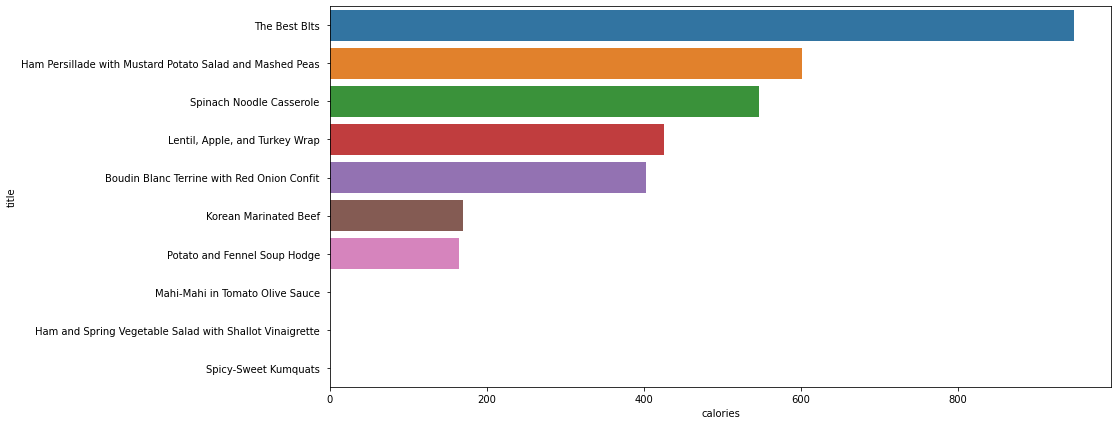

In [6]:
plt.figure(figsize=(14,7))
sns.barplot(y=Highest_calories["title"], x=Highest_calories["calories"])

In [7]:
epi_data=epi_data[:1000].dropna()

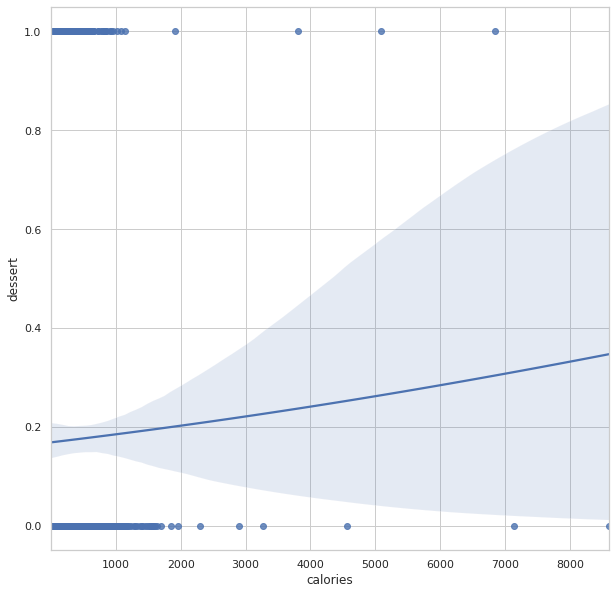

In [8]:
sns.set(style="whitegrid")
g = sns.regplot(x="calories", y="dessert", data=epi_data, logistic=True)
g.figure.set_size_inches(10,10)

In [9]:
epi_data.drop("title", inplace = True, axis=1)

Y = epi_data.dessert.values
X = epi_data.drop(["dessert"], axis = 1)

In [10]:
epi_data['dessert'].isnull().sum()

0

In [11]:
from sklearn.linear_model import LogisticRegression

In [12]:
model = LogisticRegression(solver = "liblinear")
model.fit(X,Y)

LogisticRegression(solver='liblinear')

In [13]:
model.intercept_

array([-2.0526069])

In [14]:
model.coef_

array([[-8.08362178e-02,  8.43670118e-03, -1.34757776e-01,
        -6.99871250e-02, -2.79260623e-03,  0.00000000e+00,
         0.00000000e+00, -8.16975785e-04,  0.00000000e+00,
        -8.47168581e-04,  4.73947692e-03,  0.00000000e+00,
         0.00000000e+00, -8.80008213e-01, -1.80960201e-01,
         9.86510204e-02,  0.00000000e+00, -5.53117062e-02,
         1.81593458e-01,  0.00000000e+00, -2.51332548e-02,
        -1.15293167e+00,  1.65308831e-01,  7.97204505e-02,
         1.38183870e-01,  0.00000000e+00, -6.30949151e-02,
        -5.39190312e-02, -5.52438657e-03, -1.97880648e-01,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        -1.03813492e-01,  3.84389279e-01, -3.73447239e-01,
        -1.22926908e-01,  1.26372237e+00, -1.61500883e-01,
         0.00000000e+00, -1.60032790e-01,  0.00000000e+00,
        -3.18953298e-03, -1.18264743e-01, -5.56228038e-02,
        -1.18246575e-04, -9.99014495e-04, -6.60116006e-03,
         8.47177482e-02, -7.43011284e-02, -3.34510461e-0

In [15]:
pred=model.predict(X)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [17]:
model.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [18]:
model.intercept_

array([-1.99880193])

In [19]:
model.score(X_test,Y_test)

0.9470404984423676

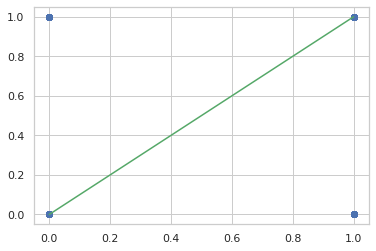

In [24]:
plt.scatter(Y_test, pred)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color = 'g')